<a href="https://colab.research.google.com/github/chaehyeon119/DataScience/blob/main/%EC%A1%B0%EB%B3%84%EC%8B%A4%EC%8A%B501_%EC%9A%B8%EB%A6%89%EB%8F%84_%EA%B8%B0%EC%98%A8_%EB%B9%84%EA%B5%90_%EA%B7%B8%EB%9E%98%ED%94%84_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 울릉도의 최고 기온& 최저 기온 구하기
19900101~20210531

In [ ]:
import csv

f = open('/content/ulleung.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',') 
header = next(data)
print(header)
f.close()

#19900101~20210531

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


최고 기온 구하기 max_temp

In [ ]:
import csv
highest_temp=-999     #최고 기온 값을 저장할 변수 #누가봐도 아닌 초기화 데이터를 넣음
max_date=''           #최고 기온이 가장이 높았던 날짜를 저장하는 변수. 문자형이라 초기값이 아무것도 없다는 ''로 해도 됨
                      #숫자형은 아무것도 없다는 ''로 할 수 없음. -> 0으로 안한 이유는? 최고기온이 0이 될 수도 있으니 아예 말도 안되는 값으로 해야 함.
                      #====> 명확한 결과를 위해 극적인 값으로 셋팅

f = open('/content/ulleung.csv', 'r', encoding='cp949') #read로 연거라 내용 삭제 안됨

data=csv.reader(f)
header=next(data)           #헤더 추출

for row in data:
                            #최고 기온 데이터가 ''(결측치) 확인
  if row[-1] == '':
    row[-1] = -999          #-999를 넣어서 빈 문자열('')이 있던 자리라고 표시
  row[-1] = float(row[-1])  # 기온 데이터 실수형으로 변환

  #최고 기온 정보를 저장

  if highest_temp < row[-1] :#최고 온도 교체시키는 과정
    max_date = row[0]
    highest_temp = row[-1]

f.close


print('기상 관측 이래 울릉도의 최고 기온이 가장 높았던 날은', max_date+'로', highest_temp, '도 였습니다.')

기상 관측 이래 울릉도의 최고 기온이 가장 높았던 날은 2013-08-08로 35.4 도 였습니다.


최저 온도 구하기 min_temp

In [ ]:
import csv
import matplotlib.pyplot as plt                 #라이브러리 임포트
lowest_temp=999 
min_date='' 

f = open('/content/ulleung.csv', 'r', encoding='cp949') 

data=csv.reader(f)
header=next(data)                               #헤더 추출

for row in data:
  if row[3] == '':
    row[3] = 999                                #-999를 넣어서 빈 문자열('')이 있던 자리라고 표시
  row[3] = float(row[3])                        #기온 데이터 실수형으로 변환

  #최저 기온 정보를 저장

  if lowest_temp > row[3] :                     #최저 온도 교체시키는 과정
    min_date = row[0]
    lowest_temp = row[3]

f.close


print('기상 관측 이래 울릉도의 최저 기온이 가장 낮았던 날은', min_date+'로', lowest_temp, '도 였습니다.')

기상 관측 이래 울릉도의 최저 기온이 가장 낮았던 날은 2003-01-29로 -11.5 도 였습니다.


plt.plot(데이터셋) 그래프 그리기




1990년 01월 01일부터 2021년 05월 31까지의 
울릉도의 최고 기온이 가장 높았던 날은 2013-08-08로 35.4 도 였고,
울릉도의 최저 기온이 가장 낮았던 날은 2003-01-29로 -11.5 도 였습니다.


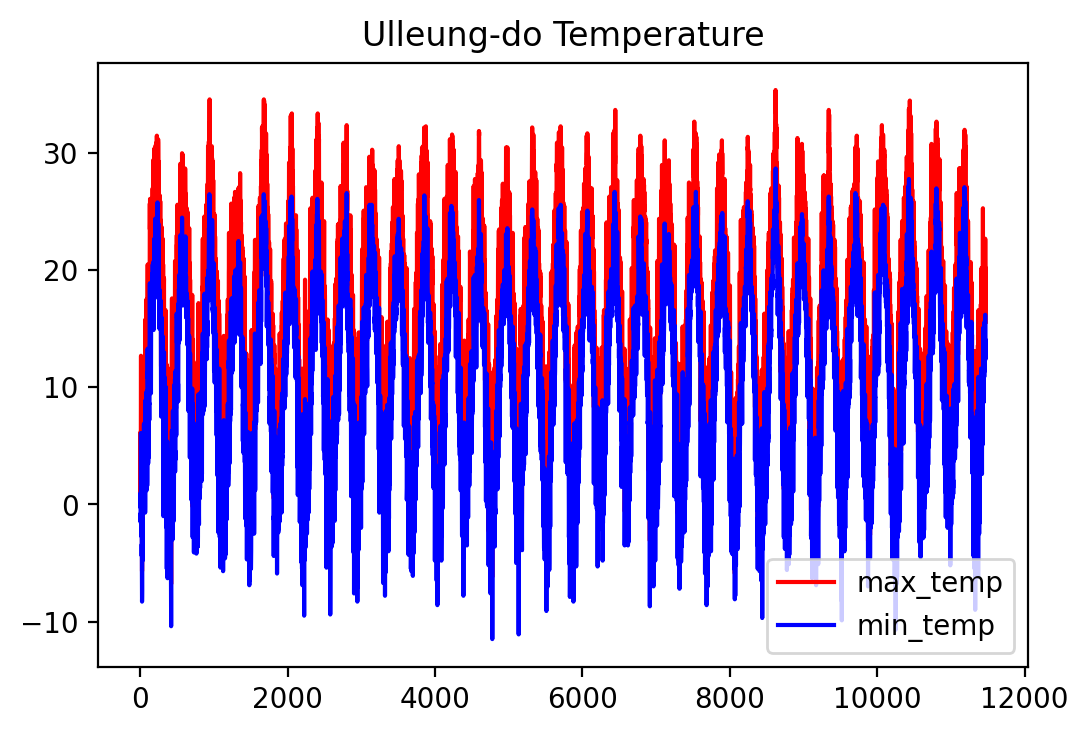

In [ ]:
import csv
import matplotlib.pyplot as plt          #라이브러리 임포트
f = open('/content/ulleung.csv', 'r', encoding='cp949')
data=csv.reader(f)
header=next(data)

min_temp = [ ]                           #결측치를 제거한 최저 기온 리스트
max_temp = [ ]                           #결측치를 제거한 최고 기온 리스트

for row in data:
  if row[-1] != '' :                     #최고 기온이 ''(빈문자열)이 아니면,
     max_temp.append(float(row[-1]))     #[-1] => 최고 기온 뒤에서 첫 번째
  if row[-2] != '' :
    min_temp.append(float(row[-2]))#[-2] #[-2] => 최저 기온 뒤에서 두 번째

min_temp
max_temp


print('\n1990년 01월 01일부터 2021년 05월 31까지의 \n울릉도의 최고 기온이 가장 높았던 날은', max_date+'로', highest_temp,'도 였고,')
print('울릉도의 최저 기온이 가장 낮았던 날은', min_date+'로', lowest_temp,'도 였습니다.')
plt.figure(dpi=200)                       #dip를 넣으면 해상도가 커짐
plt.title('Ulleung-do Temperature')       #타이틀 속성 추가
plt.plot(max_temp, 'r', label='max_temp') #max_temp를 'r'(red) 색 그래프로 그리고 'max_temp' label을 붙인다.
plt.plot(min_temp, 'b', label='min_temp') #mix_tempfmf 'b'(blue)색 그래프로 그리고 'min_temp' label을 붙인다.

plt.legend()                              #그래프에 범례 속성 추가 => min_temp, max_temp 라벨을 그래프에 나타낸다.
plt.show()